# [돌 그룹](https://www.acmicpc.net/problem/12886)

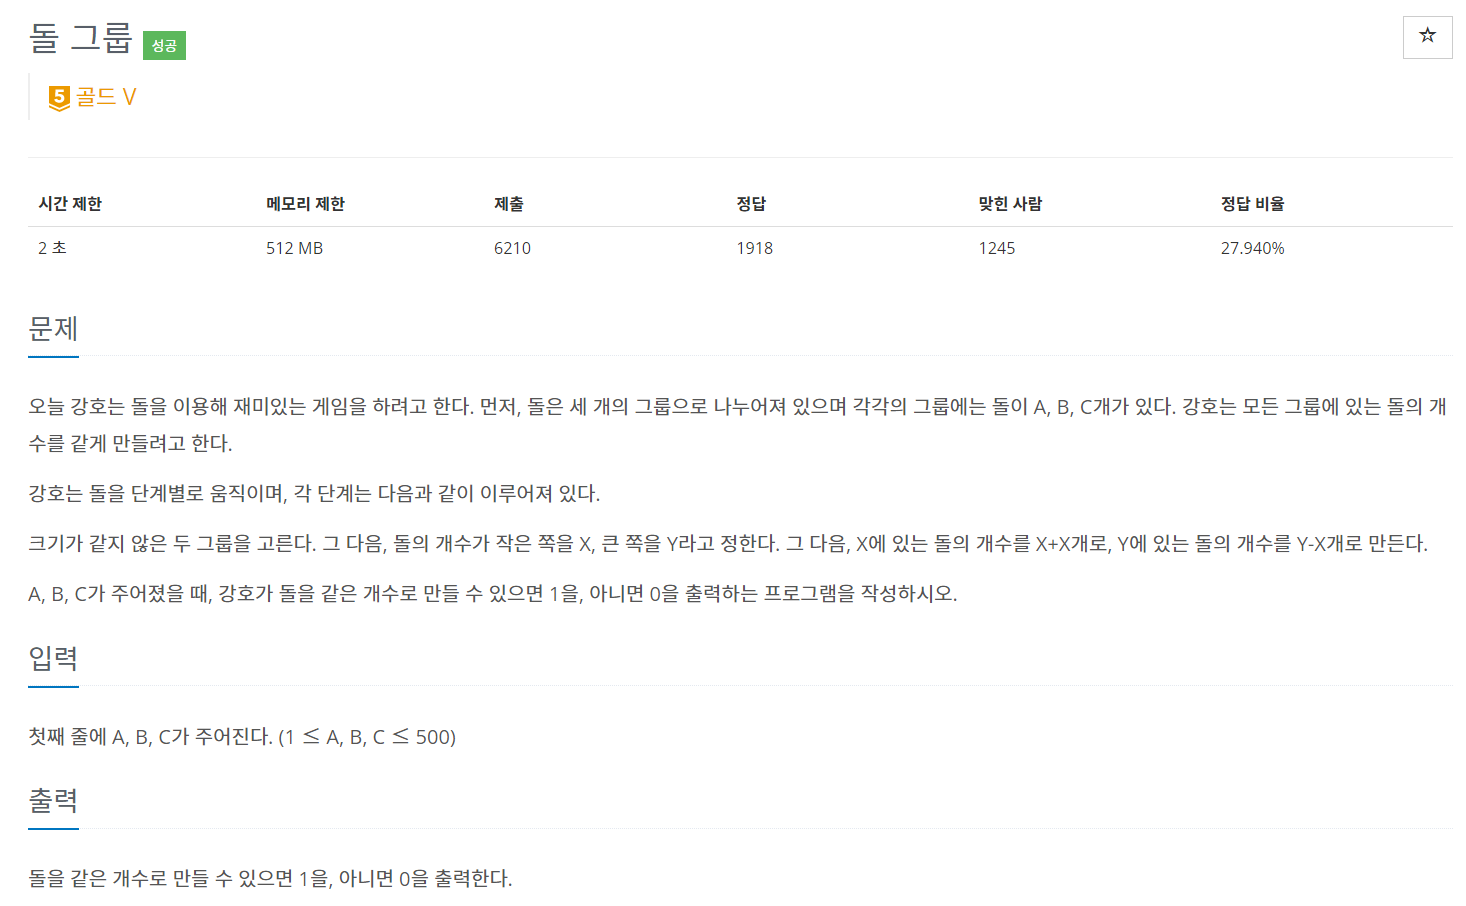

<!-- ![](image/12886.png) -->
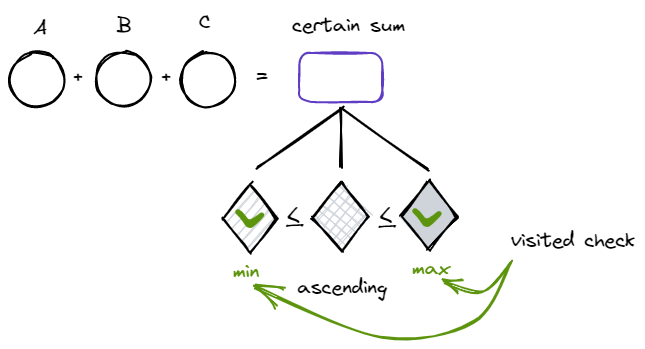

In [ ]:
import sys
from collections import deque

a, b, c = map(int, input().split())
total = a+b+c
q = deque()
visited = [[False]*1501 for _ in range(1501)]
a, b = min(a, b, c), max(a, b, c)
q.append((a, b))
visited[a][b] = True #가장 작은 것과 가장 큰 것을 알고 있으면 중간값은 굳이 쓰지 않아도 반드시 한 개가 나온다.

if total % 3 == 0:
    while q:
        a, b = q.popleft()
        c = total-a-b
        if a == b == c:
            print(1)
            sys.exit() # 프로그램 종료
        for na, nb in ((a, b), (a, c), (b, c)):
            if na < nb:
                na += na
                nb -= na
            elif na > nb:
                na -= nb
                nb += nb
            else:
                continue
            nc = total - na-nb
            x = min(na, nb, nc)
            y = max(na, nb, nc)
            if x < 0:
                continue
            if not visited[x][y]:
                visited[x][y] = True
                q.append((x, y))
print(0)  # while문을 거치지 않거나 while문 내에서 프로그램이 종료되지 않으면 0 출력

In [ ]:
'''
틀린 풀이!!!!

import sys
from collections import deque

arr = list(map(int, input().split()))
# i가 가장 작은 수로서 선택, 두 번째 수로 선택됨, 세 번째 수로 선택될 때
# ex) visited[3] = [True,True,False] 이면 3,x,x 이거나 x,3,x인 적이 있다.
visited = [[False, False, False] for _ in range(1501)]
q = deque()
arr.sort()

visited[arr[0]][0] = True  # arr[0] 숫자가 첫 번째에 자리하게 되는  경우
visited[arr[1]][1] = True  # arr[1] 숫자가 두 번째에 자리하게 되는 경우
visited[arr[2]][2] = True  # arr[2] 숫자가 세 번째에 자리하게 되는 경우
total = sum(arr)

if total % 3 != 0:
    print(0)
else:
    q.append(arr)
    while q:
        arr = q.popleft()  # 크기 순으로 정렬된 숫자
        a, b, c = arr
        if a == b == c:
            print(1)
            sys.exit()
        else:
            for na, nb in ((a, b), (b, c), (a, c)):
                if na == nb:
                    continue
                z = total - na-nb
                x, y = na+na, nb-na
                x, y, z = sorted((x, y, z))
                if x < 0:
                    continue
                if x == y == z:
                    print(1)
                    sys.exit()
                if not visited[x][0] or not visited[y][1] or not visited[z][2]:
                    visited[x][0], visited[y][1], visited[z][2] = True, True, True
                    q.append([x, y, z])
    print(0)
'''

## 안 되는 이유

### a,..,..
### ..,b,..
### ..,..,c

## 위와 같은 상황 때문에 a,b,c가 큐 안에 못 들어감
ex)
10 18 20

8 20 20  ← 8  X  X 방문처리  
12 16 20 ← X 16  X 방문처리  
4 20 24  ← X  X 24 방문처리  

8 16 24 새로운 경우인데도 들어갈 수 없음  
